In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv('/content/trainKNN.txt')

In [32]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [33]:
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [34]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [35]:
df.shape

(195, 11)

In [36]:
df_test=pd.read_csv('/content/testKNN.txt')
df_test.head()

,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [37]:
df_test.columns = ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [38]:
df_test.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [39]:
del df_test['Id number']

In [40]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [41]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [42]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [43]:
df_test['Type of glass'].unique()


array([1, 2, 3, 5, 6, 7])

In [44]:
df['Type of glass'].shape
del df['Id number']


In [45]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [46]:
# x_train=df[['RI','Na','Mg','Al','Si','Ba','Fe']]
# y_train=df['Type of glass']
# x_test=df_test[['RI','Na','Mg','Al','Si','Ba','Fe']]
# y_test=df_test['Type of glass']
x=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y=df['Type of glass']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

scale=StandardScaler()

x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.59      0.84      0.70        19
           2       0.68      0.65      0.67        20
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       1.00      0.79      0.88        14

    accuracy                           0.69        59
   macro avg       0.55      0.46      0.48        59
weighted avg       0.69      0.69      0.68        59



In [47]:
accuracy_score(y_test,y_pred)

0.6949152542372882

In [48]:
knn=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

accuracy_score(y_test,y_pred)

0.7288135593220338

In [49]:
for k in [1,2,3,4,5,6,7,8,9,10]:
  knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  # print(f"k = : {k}  accuracy: {accuracy_score(y_test,y_pred)} val accuracy: {np.mean(cross_val_score(knn,x_train,y_train, cv=10))}")
  print(f"K value : {k} , train score : {knn.score(x_test,y_test)}, cross val score  : {np.mean(cross_val_score(knn, x_train, y_train, cv=10))}")

K value : 1 , train score : 0.7288135593220338, cross val score  : 0.6565934065934066
K value : 2 , train score : 0.7457627118644068, cross val score  : 0.6631868131868133
K value : 3 , train score : 0.7627118644067796, cross val score  : 0.6653846153846154
K value : 4 , train score : 0.7288135593220338, cross val score  : 0.6565934065934066
K value : 5 , train score : 0.6949152542372882, cross val score  : 0.6346153846153847
K value : 6 , train score : 0.7288135593220338, cross val score  : 0.6489010989010989
K value : 7 , train score : 0.7288135593220338, cross val score  : 0.634065934065934
K value : 8 , train score : 0.6949152542372882, cross val score  : 0.6417582417582417
K value : 9 , train score : 0.7457627118644068, cross val score  : 0.6192307692307693
K value : 10 , train score : 0.7457627118644068, cross val score  : 0.6346153846153847


In [50]:
for k in [1,2,3,4,5,6,7,8,9,10]:
  knn=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  # print(f"k = : {k}  accuracy: {accuracy_score(y_test,y_pred)} val accuracy: {np.mean(cross_val_score(knn,x_train,y_train, cv=10))}")
  print(f"K value : {k} , train score : {knn.score(x_test,y_test)}, cross val score  : {np.mean(cross_val_score(knn, x_train, y_train, cv=10))}")

K value : 1 , train score : 0.7627118644067796, cross val score  : 0.7285714285714285
K value : 2 , train score : 0.7966101694915254, cross val score  : 0.6703296703296704
K value : 3 , train score : 0.7966101694915254, cross val score  : 0.6862637362637363
K value : 4 , train score : 0.7966101694915254, cross val score  : 0.6857142857142857
K value : 5 , train score : 0.7288135593220338, cross val score  : 0.6774725274725275
K value : 6 , train score : 0.7627118644067796, cross val score  : 0.6631868131868132
K value : 7 , train score : 0.7457627118644068, cross val score  : 0.6565934065934066
K value : 8 , train score : 0.7288135593220338, cross val score  : 0.6708791208791209
K value : 9 , train score : 0.7627118644067796, cross val score  : 0.6928571428571428
K value : 10 , train score : 0.7457627118644068, cross val score  : 0.6780219780219781


test accuracy for euclidean metric: 73.0%, cross-val score for euclidean metric: 66.0%
****************************************************************************************************
test accuracy for manhattan metric: 76.0%,  cross-val score for manhattan metric: 73.0%


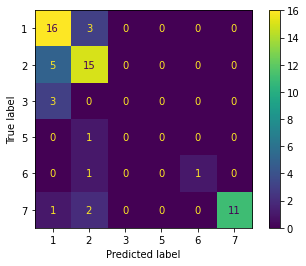

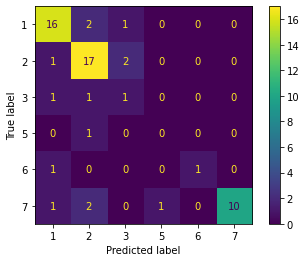

In [52]:
knn=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
con=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(knn,x_test,y_test.values)
print(f"test accuracy for euclidean metric: {round(knn.score(x_test,y_test),2)*100}%, cross-val score for euclidean metric: {round(np.mean(cross_val_score(knn,x_train,y_train, cv=10)),2)*100}%")
knn=KNeighborsClassifier(n_neighbors=1,metric='manhattan')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(knn,x_test,y_test)
print('*'*100)
print(f"test accuracy for manhattan metric: {round(knn.score(x_test,y_test),2)*100}%,  cross-val score for manhattan metric: {round(np.mean(cross_val_score(knn,x_train,y_train, cv=10)),2)*100}%")

**the Manhattan is giving more accuracy over euclidean**

**approximately 3% more accurate**